## Running several transfer learning model experiments with different hyperparameters

In [ ]:
"""
Moved pip installs outside of py scripts as apparently it's best practice.
"""
# See if torchmetrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  print("torchmetrics already installed.")
except:
  print("Installing torchmetrics...")
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print("Done installing torchmetrics.")

Installing torchmetrics...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
Done installing torchmetrics.


In [ ]:
"""
Create the going_modular folder and move in its scripts.
"""
import os

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
  from going_modular import data_setup, engine, get_any_data
  print("going_modular scripts already downloaded.")
except:
  """
  This block attempts to download a GitHub repository,
  move a specific directory from the downloaded repository to the current working directory,
  and then remove the downloaded repository.
  """
  # Get the going_modular scripts
  print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")

  # Clone the git repository
  !git clone https://github.com/lanehale/pytorch-deep-learning

  # When cloning a GitHub repository, the directory structure on your local machine doesn't include /tree/main/, so it shouldn't be included in the mv command.
  # The . at the end of the command tells mv to move the specified directory into the current working directory.
  !mv pytorch-deep-learning/going_modular .

  # remove the downloaded repository
  !rm -rf pytorch-deep-learning

  # move these two files out to parent directory
  !mv going_modular/train.py .
  !mv going_modular/predict.py .

  from going_modular import data_setup, engine, get_any_data

print(">!ls")
!ls
print(">!ls going_modular")
!ls going_modular

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 380, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 380 (delta 100), reused 48 (delta 48), pack-reused 259 (from 2)
Receiving objects: 100% (380/380), 5.83 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (217/217), done.
>!ls
going_modular  predict.py  sample_data	train.py
>!ls going_modular
data_setup.py	  get_any_data.py     model_builder.py	     __pycache__
download_data.py  get_custom_data.py  pretrained_confmat.py  utils.py
engine.py	  get_data.py	      pretrained_writer.py


In [ ]:
# Get 10% dataset
get_any_data.from_path(from_path="pizza_steak_sushi.zip", image_dir="pizza_steak_sushi")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza_steak_sushi data...
>!ls data/pizza_steak_sushi
test
train



## Train the models with the pretrained.py script from 06_transfer_learning_scripts

### Train EfficientNet_B0 for 5 epochs with 10% dataset

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 155MB/s]


Training the model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0313 | train_acc: 0.5117 | test_loss: 0.8690 | test_acc: 0.6723
Epoch: 2 | train_loss: 0.8755 | train_acc: 0.6953 | test_loss: 0.7995 | test_acc: 0.7027
Epoch: 3 | train_loss: 0.7953 | train_acc: 0.6523 | test_loss: 0.6977 | test_acc: 0.8248
Epoch: 4 | train_loss: 0.7233 | train_acc: 0.7656 | test_loss: 0.5791 | test_acc: 0.9062
Epoch: 5 | train_loss: 0.6085 | train_acc: 0.8906 | test_loss: 0.5739 | test_acc: 0.8759
[INFO] Total running time: 12.952 seconds
Predicting with image_data...
Max test acc: 0.906 | Min test loss: 0.574


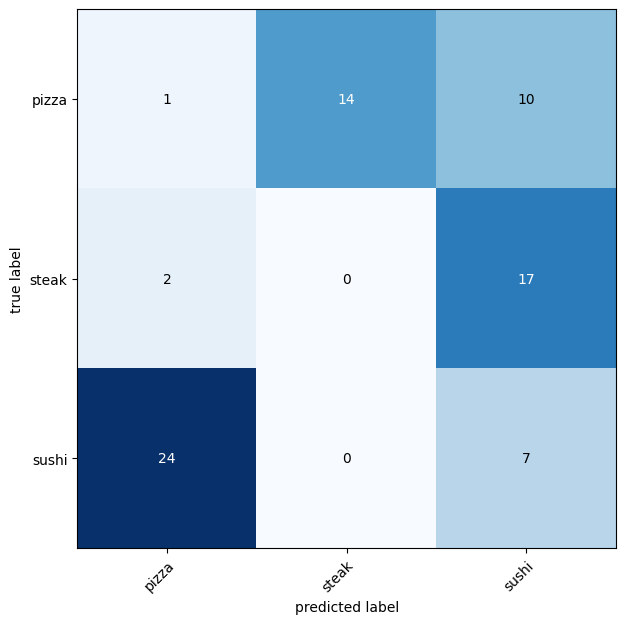

In [ ]:
import torch
import torchvision

from pathlib import Path
from going_modular import pretrained_confmat as pretrained

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

image_path = Path("data/pizza_steak_sushi")

# Set up dirs
train_dir = image_path / "train"
test_dir = image_path / "test"    # train/test ratio is actually 67/33 (150/225, 75/225)

test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))  # this is only used for predictions

BATCH_SIZE = 32
dropout = 0.2
in_features = 1280
optimizer_type = "Adam"
optimizer_lr = 0.001

weights_b0 = torchvision.models.EfficientNet_B0_Weights.DEFAULT  # .DEFAULT = best available weights from pretraining on ImageNet
weights_b2 = torchvision.models.EfficientNet_B2_Weights.DEFAULT

"""
Train EffNetB0 for 5 epochs with 10% dataset
"""
NUM_EPOCHS = 5

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b0_5x_10p = torchvision.models.efficientnet_b0(weights=weights_b0).to(device)

results_b0_5x_10p, pred_list_b0_5x_10p = pretrained.run_model(
    model=model_b0_5x_10p,
    weights=weights_b0,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list,
    device=device
)

### Train EfficientNet_B0 for 10 epochs with 10% dataset

Training the model...


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0313 | train_acc: 0.5117 | test_loss: 0.8690 | test_acc: 0.6723
Epoch: 2 | train_loss: 0.8755 | train_acc: 0.6953 | test_loss: 0.7995 | test_acc: 0.7027
Epoch: 3 | train_loss: 0.7953 | train_acc: 0.6523 | test_loss: 0.6977 | test_acc: 0.8248
Epoch: 4 | train_loss: 0.7233 | train_acc: 0.7656 | test_loss: 0.5791 | test_acc: 0.9062
Epoch: 5 | train_loss: 0.6085 | train_acc: 0.8906 | test_loss: 0.5739 | test_acc: 0.8759
Epoch: 6 | train_loss: 0.5446 | train_acc: 0.9375 | test_loss: 0.5947 | test_acc: 0.8456
Epoch: 7 | train_loss: 0.5724 | train_acc: 0.7891 | test_loss: 0.5502 | test_acc: 0.8352
Epoch: 8 | train_loss: 0.4594 | train_acc: 0.9531 | test_loss: 0.4931 | test_acc: 0.8561
Epoch: 9 | train_loss: 0.5643 | train_acc: 0.7891 | test_loss: 0.4967 | test_acc: 0.8456
Epoch: 10 | train_loss: 0.4993 | train_acc: 0.7969 | test_loss: 0.4784 | test_acc: 0.8561
[INFO] Total running time: 23.898 seconds
Predicting with image_data...
Max test acc: 0.906 | Min test loss: 

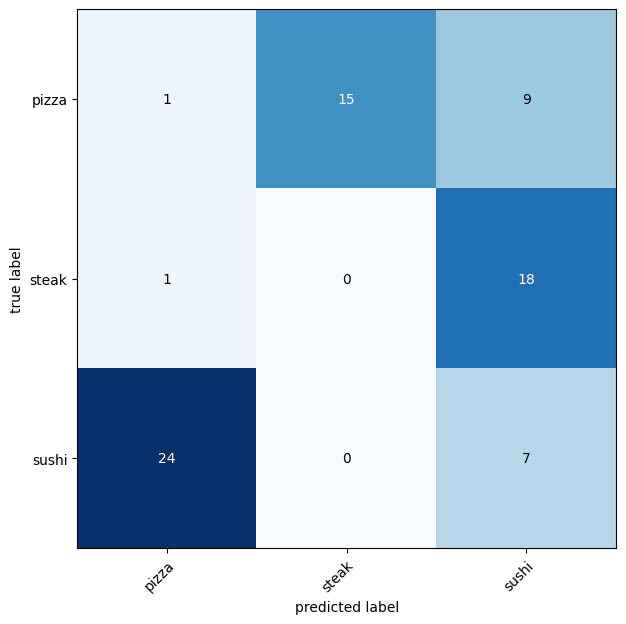

In [ ]:
"""
Train EffNetB0 for 10 epochs with 10% dataset
"""
NUM_EPOCHS = 10

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b0_10x_10p = torchvision.models.efficientnet_b0(weights=weights_b0).to(device)

results_b0_10x_10p, pred_list_b0_10x_10p = pretrained.run_model(
    model=model_b0_10x_10p,
    weights=weights_b0,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list,
    device=device
)

### Train EfficientNet_B2 for 5 epochs with 10% dataset

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 135MB/s]


Training the model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0852 | train_acc: 0.3867 | test_loss: 0.9224 | test_acc: 0.7538
Epoch: 2 | train_loss: 0.9143 | train_acc: 0.6641 | test_loss: 0.8252 | test_acc: 0.8059
Epoch: 3 | train_loss: 0.8217 | train_acc: 0.7539 | test_loss: 0.6787 | test_acc: 0.8968
Epoch: 4 | train_loss: 0.6747 | train_acc: 0.9023 | test_loss: 0.6456 | test_acc: 0.8665
Epoch: 5 | train_loss: 0.6669 | train_acc: 0.8242 | test_loss: 0.6390 | test_acc: 0.8466
[INFO] Total running time: 16.173 seconds
Predicting with image_data...
Max test acc: 0.897 | Min test loss: 0.639


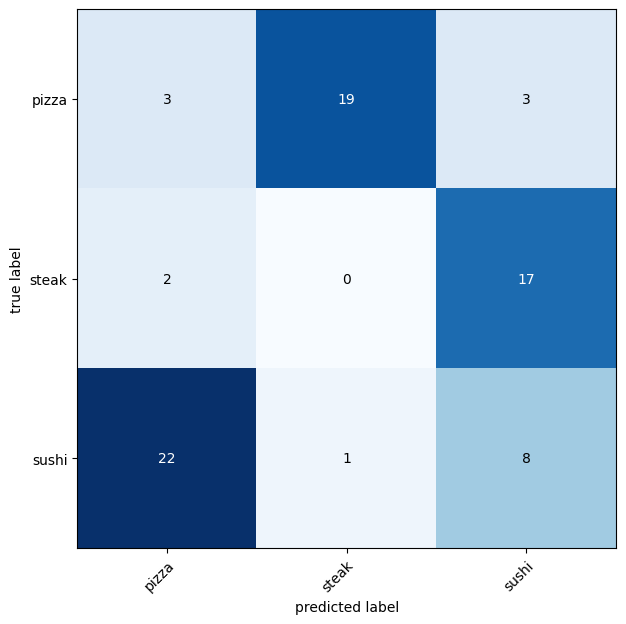

In [ ]:
"""
Train EffNetB2 for 5 epochs with 10% dataset
"""
dropout = 0.3
in_features = 1408
NUM_EPOCHS = 5

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b2_5x_10p = torchvision.models.efficientnet_b2(weights=weights_b2).to(device)

results_b2_5x_10p, pred_list_b2_5x_10p = pretrained.run_model(
    model=model_b2_5x_10p,
    weights=weights_b2,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list,
    device=device
)

### Train EfficientNet_B2 for 10 epochs with 10% dataset

Training the model...


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0852 | train_acc: 0.3867 | test_loss: 0.9224 | test_acc: 0.7538
Epoch: 2 | train_loss: 0.9143 | train_acc: 0.6641 | test_loss: 0.8252 | test_acc: 0.8059
Epoch: 3 | train_loss: 0.8217 | train_acc: 0.7539 | test_loss: 0.6787 | test_acc: 0.8968
Epoch: 4 | train_loss: 0.6747 | train_acc: 0.9023 | test_loss: 0.6456 | test_acc: 0.8665
Epoch: 5 | train_loss: 0.6669 | train_acc: 0.8242 | test_loss: 0.6390 | test_acc: 0.8466
Epoch: 6 | train_loss: 0.5795 | train_acc: 0.8008 | test_loss: 0.5625 | test_acc: 0.9072
Epoch: 7 | train_loss: 0.5668 | train_acc: 0.8125 | test_loss: 0.5567 | test_acc: 0.9280
Epoch: 8 | train_loss: 0.5009 | train_acc: 0.9414 | test_loss: 0.5881 | test_acc: 0.8674
Epoch: 9 | train_loss: 0.5177 | train_acc: 0.8047 | test_loss: 0.5837 | test_acc: 0.8570
Epoch: 10 | train_loss: 0.4651 | train_acc: 0.9453 | test_loss: 0.5410 | test_acc: 0.8570
[INFO] Total running time: 34.646 seconds
Predicting with image_data...
Max test acc: 0.928 | Min test loss: 

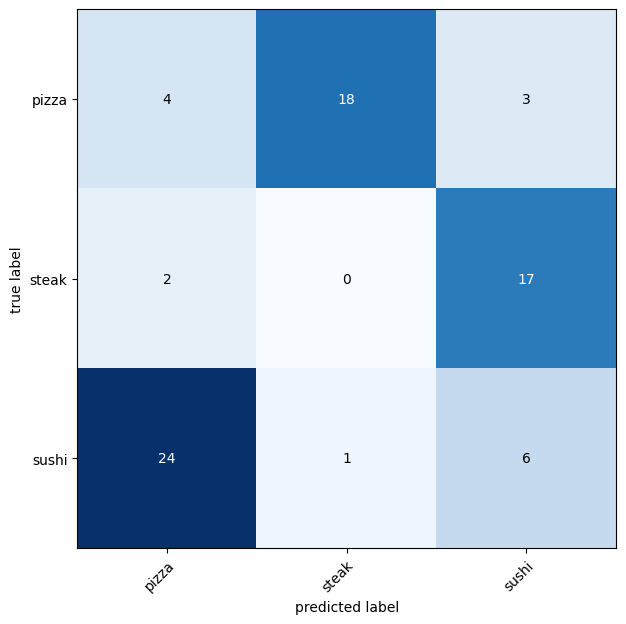

In [ ]:
"""
Train EffNetB2 for 10 epochs with 10% dataset
"""
NUM_EPOCHS = 10

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b2_10x_10p = torchvision.models.efficientnet_b2(weights=weights_b2).to(device)

results_b2_10x_10p, pred_list_b2_10x_10p = pretrained.run_model(
    model=model_b2_10x_10p,
    weights=weights_b2,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list,
    device=device
)

In [ ]:
# Get 20% dataset
from going_modular import get_any_data

get_any_data.from_path(from_path="pizza_steak_sushi_20_percent.zip", image_dir="pizza_steak_sushi_20")

Did not find data/pizza_steak_sushi_20 directory, creating one...
Unzipping pizza_steak_sushi_20 data...
>!ls data/pizza_steak_sushi_20
test
train



### Train EfficientNet_B0 for 5 epochs with 20% dataset

Training the model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9514 | train_acc: 0.5979 | test_loss: 0.6660 | test_acc: 0.8568
Epoch: 2 | train_loss: 0.6948 | train_acc: 0.7896 | test_loss: 0.5529 | test_acc: 0.8670
Epoch: 3 | train_loss: 0.5757 | train_acc: 0.8354 | test_loss: 0.4710 | test_acc: 0.8818
Epoch: 4 | train_loss: 0.5072 | train_acc: 0.8417 | test_loss: 0.4227 | test_acc: 0.8881
Epoch: 5 | train_loss: 0.4902 | train_acc: 0.8063 | test_loss: 0.3990 | test_acc: 0.8881
[INFO] Total running time: 26.921 seconds
Predicting with image_data...
Max test acc: 0.888 | Min test loss: 0.399


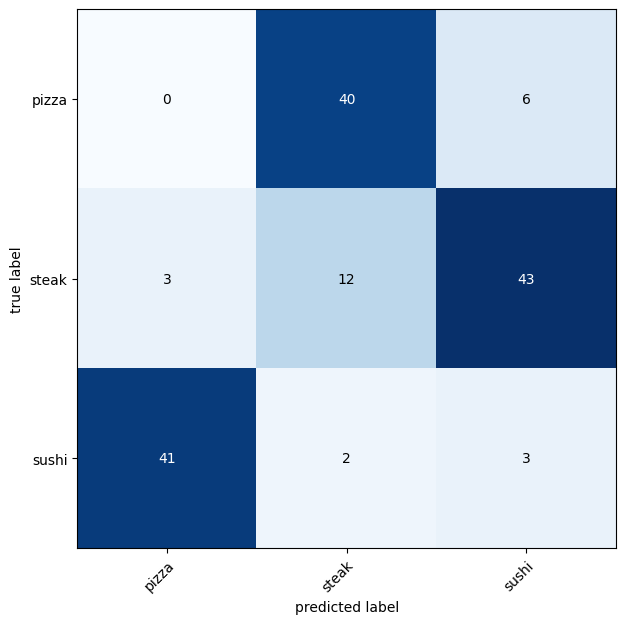

In [ ]:
image_path = Path("data/pizza_steak_sushi_20")

# Set up dirs
train_dir = image_path / "train"
test_dir = image_path / "test"    # use 20% test path to maintain 67/33 train/test ratio (300/450, 150/450)

test_image_path_list_20 = list(Path(test_dir).glob("*/*.jpg"))  # this is only used for predictions

"""
Train EffNetB0 for 5 epochs with 20% dataset
"""
dropout = 0.2
in_features = 1280
NUM_EPOCHS = 5

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b0_5x_20p = torchvision.models.efficientnet_b0(weights=weights_b0).to(device)

results_b0_5x_20p, pred_list_b0_5x_20p = pretrained.run_model(
    model=model_b0_5x_20p,
    weights=weights_b0,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list_20,
    device=device
)

### Train EfficientNet_B0 for 10 epochs with 20% dataset

Training the model...


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9514 | train_acc: 0.5979 | test_loss: 0.6660 | test_acc: 0.8568
Epoch: 2 | train_loss: 0.6948 | train_acc: 0.7896 | test_loss: 0.5529 | test_acc: 0.8670
Epoch: 3 | train_loss: 0.5757 | train_acc: 0.8354 | test_loss: 0.4710 | test_acc: 0.8818
Epoch: 4 | train_loss: 0.5072 | train_acc: 0.8417 | test_loss: 0.4227 | test_acc: 0.8881
Epoch: 5 | train_loss: 0.4902 | train_acc: 0.8063 | test_loss: 0.3990 | test_acc: 0.8881
Epoch: 6 | train_loss: 0.3797 | train_acc: 0.9187 | test_loss: 0.3863 | test_acc: 0.9006
Epoch: 7 | train_loss: 0.3710 | train_acc: 0.9104 | test_loss: 0.3517 | test_acc: 0.9097
Epoch: 8 | train_loss: 0.3500 | train_acc: 0.8917 | test_loss: 0.3306 | test_acc: 0.9102
Epoch: 9 | train_loss: 0.2974 | train_acc: 0.9187 | test_loss: 0.3117 | test_acc: 0.9006
Epoch: 10 | train_loss: 0.3665 | train_acc: 0.8771 | test_loss: 0.3169 | test_acc: 0.8943
[INFO] Total running time: 47.406 seconds
Predicting with image_data...
Max test acc: 0.910 | Min test loss: 

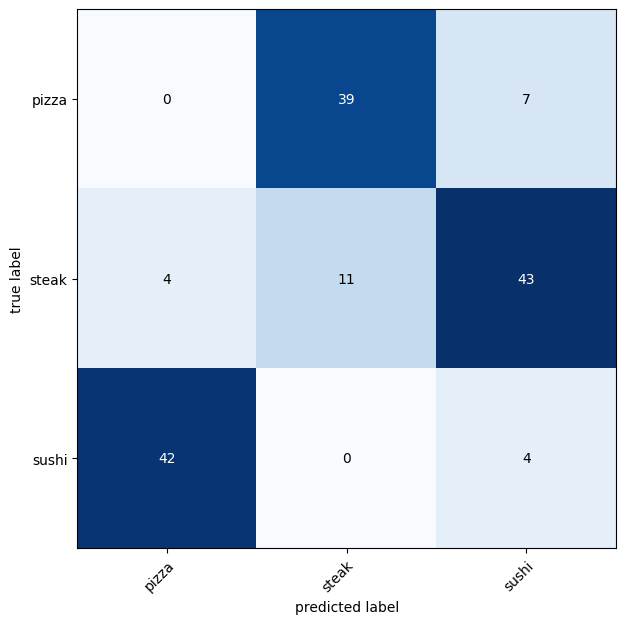

In [ ]:
"""
Train EffNetB0 for 10 epochs with 20% dataset
"""
NUM_EPOCHS = 10

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b0_10x_20p = torchvision.models.efficientnet_b0(weights=weights_b0).to(device)

results_b0_10x_20p, pred_list_b0_10x_20p = pretrained.run_model(
    model=model_b0_10x_20p,
    weights=weights_b0,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list_20,
    device=device
)

### Train EfficientNet_B2 for 5 epochs with 20% dataset

Training the model...


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9791 | train_acc: 0.5604 | test_loss: 0.7128 | test_acc: 0.9011
Epoch: 2 | train_loss: 0.7206 | train_acc: 0.8063 | test_loss: 0.5769 | test_acc: 0.9443
Epoch: 3 | train_loss: 0.5971 | train_acc: 0.7937 | test_loss: 0.4906 | test_acc: 0.9437
Epoch: 4 | train_loss: 0.5227 | train_acc: 0.8271 | test_loss: 0.4484 | test_acc: 0.9222
Epoch: 5 | train_loss: 0.4196 | train_acc: 0.8917 | test_loss: 0.3825 | test_acc: 0.9375
[INFO] Total running time: 31.279 seconds
Predicting with image_data...
Max test acc: 0.944 | Min test loss: 0.382


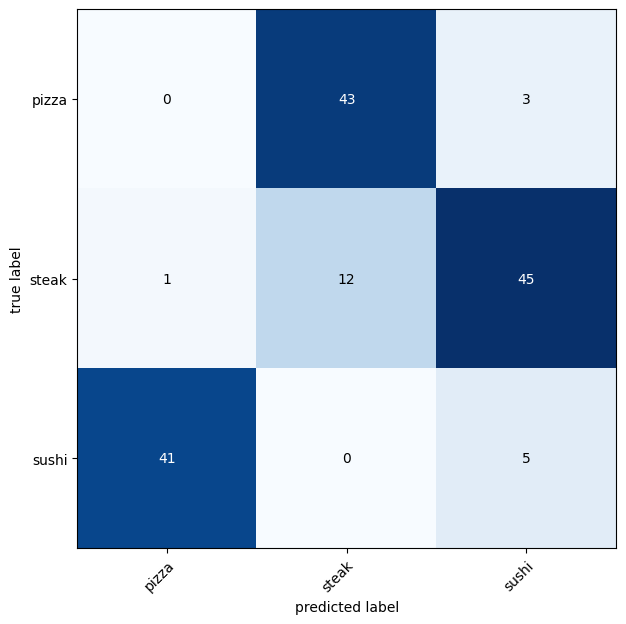

In [ ]:
"""
Train EffNetB2 for 5 epochs with 20% dataset
"""
dropout = 0.3
in_features = 1408
NUM_EPOCHS = 5

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b2_5x_20p = torchvision.models.efficientnet_b2(weights=weights_b2).to(device)

results_b2_5x_20p, pred_list_b2_5x_20p = pretrained.run_model(
    model=model_b2_5x_20p,
    weights=weights_b2,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list_20,
    device=device
)

### Train EfficientNet_B2 for 10 epochs with 20% dataset

Training the model...


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9791 | train_acc: 0.5604 | test_loss: 0.7128 | test_acc: 0.9011
Epoch: 2 | train_loss: 0.7206 | train_acc: 0.8063 | test_loss: 0.5769 | test_acc: 0.9443
Epoch: 3 | train_loss: 0.5971 | train_acc: 0.7937 | test_loss: 0.4906 | test_acc: 0.9437
Epoch: 4 | train_loss: 0.5227 | train_acc: 0.8271 | test_loss: 0.4484 | test_acc: 0.9222
Epoch: 5 | train_loss: 0.4196 | train_acc: 0.8917 | test_loss: 0.3825 | test_acc: 0.9375
Epoch: 6 | train_loss: 0.3838 | train_acc: 0.9083 | test_loss: 0.3493 | test_acc: 0.9443
Epoch: 7 | train_loss: 0.3517 | train_acc: 0.9208 | test_loss: 0.3165 | test_acc: 0.9688
Epoch: 8 | train_loss: 0.3706 | train_acc: 0.9062 | test_loss: 0.3061 | test_acc: 0.9534
Epoch: 9 | train_loss: 0.3070 | train_acc: 0.9396 | test_loss: 0.2988 | test_acc: 0.9597
Epoch: 10 | train_loss: 0.3613 | train_acc: 0.8958 | test_loss: 0.2692 | test_acc: 0.9750
[INFO] Total running time: 59.450 seconds
Predicting with image_data...
Max test acc: 0.975 | Min test loss: 

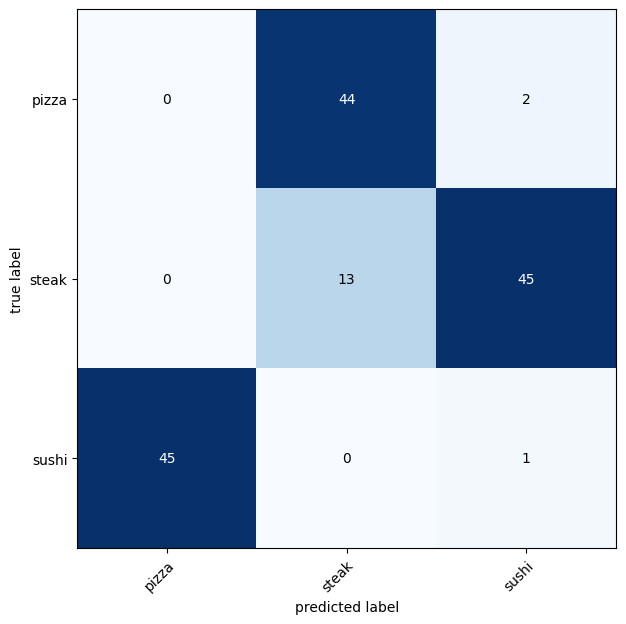

In [ ]:
"""
Train EffNetB2 for 10 epochs with 20% dataset
"""
NUM_EPOCHS = 10

# Set up the model with pretrained weights and send it to the target device (torchvision v0.13+)
model_b2_10x_20p = torchvision.models.efficientnet_b2(weights=weights_b2).to(device)

results_b2_10x_20p, pred_list_b2_10x_20p = pretrained.run_model(
    model=model_b2_10x_20p,
    weights=weights_b2,
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    dropout=dropout,
    in_features=in_features,
    optimizer_type=optimizer_type,
    optimizer_lr=optimizer_lr,
    num_epochs=NUM_EPOCHS,
    image_data=test_image_path_list_20,
    device=device
)

## Compare the results

In [ ]:
# Create a function to display results
def compare_results(pred_list, name):
  false_count = 0
  for pred in pred_list:
    if pred['correct'] == False:
      false_count += 1
  false_percent = 100 * false_count / len(pred_list)
  print(
      f"{name :<10} | False predictions: {false_count :<2} out of {len(pred_list) :<3}, "
      f"or {false_percent:5.2f}% wrong, "
      f"{(100.0 - false_percent):.2f}% right"
  )

In [ ]:
compare_results(pred_list_b0_5x_10p, "b0_5x_10p")
compare_results(pred_list_b2_5x_10p, "b2_5x_10p")
compare_results(pred_list_b0_10x_10p, "b0_10x_10p")
compare_results(pred_list_b2_10x_10p, "b2_10x_10p")
compare_results(pred_list_b0_5x_20p, "b0_5x_20p")
compare_results(pred_list_b2_5x_20p, "b2_5x_20p")
compare_results(pred_list_b0_10x_20p, "b0_10x_20p")
compare_results(pred_list_b2_10x_20p, "b2_10x_20p")

b0_5x_10p  | False predictions: 10 out of 75 , or 13.33% wrong, 86.67% right
b2_5x_10p  | False predictions: 9  out of 75 , or 12.00% wrong, 88.00% right
b0_10x_10p | False predictions: 10 out of 75 , or 13.33% wrong, 86.67% right
b2_10x_10p | False predictions: 8  out of 75 , or 10.67% wrong, 89.33% right
b0_5x_20p  | False predictions: 17 out of 150, or 11.33% wrong, 88.67% right
b2_5x_20p  | False predictions: 10 out of 150, or  6.67% wrong, 93.33% right
b0_10x_20p | False predictions: 16 out of 150, or 10.67% wrong, 89.33% right
b2_10x_20p | False predictions: 4  out of 150, or  2.67% wrong, 97.33% right


In [ ]:
print(f"Max test acc: {max(results_b0_5x_10p['test_acc']):.3f} | Min test loss: {min(results_b0_5x_10p['test_loss']):.3f}")
print(f"Max test acc: {max(results_b2_5x_10p['test_acc']):.3f} | Min test loss: {min(results_b2_5x_10p['test_loss']):.3f}")
print(f"Max test acc: {max(results_b0_5x_20p['test_acc']):.3f} | Min test loss: {min(results_b0_5x_20p['test_loss']):.3f}")
print(f"Max test acc: {max(results_b2_5x_20p['test_acc']):.3f} | Min test loss: {min(results_b2_5x_20p['test_loss']):.3f}")
print()
print(f"Max test acc: {max(results_b0_10x_10p['test_acc']):.3f} | Min test loss: {min(results_b0_10x_10p['test_loss']):.3f}")
print(f"Max test acc: {max(results_b2_10x_10p['test_acc']):.3f} | Min test loss: {min(results_b2_10x_10p['test_loss']):.3f}")
print(f"Max test acc: {max(results_b0_10x_20p['test_acc']):.3f} | Min test loss: {min(results_b0_10x_20p['test_loss']):.3f}")
print(f"Max test acc: {max(results_b2_10x_20p['test_acc']):.3f} | Min test loss: {min(results_b2_10x_20p['test_loss']):.3f}")

Max test acc: 0.906 | Min test loss: 0.574
Max test acc: 0.897 | Min test loss: 0.639
Max test acc: 0.888 | Min test loss: 0.399
Max test acc: 0.944 | Min test loss: 0.382

Max test acc: 0.906 | Min test loss: 0.478
Max test acc: 0.928 | Min test loss: 0.541
Max test acc: 0.910 | Min test loss: 0.312
Max test acc: 0.975 | Min test loss: 0.269


### Plot 3 most wrong predictions of EffNetB0 5 epochs 10% data

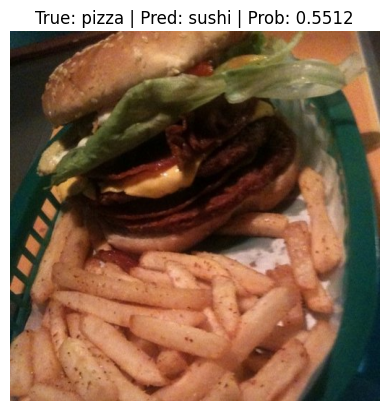

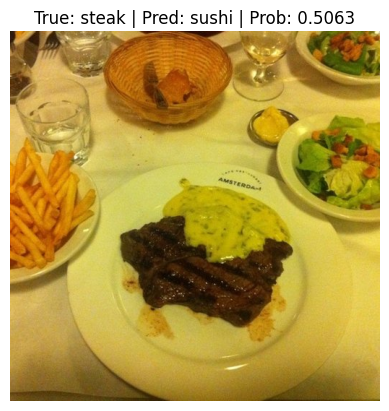

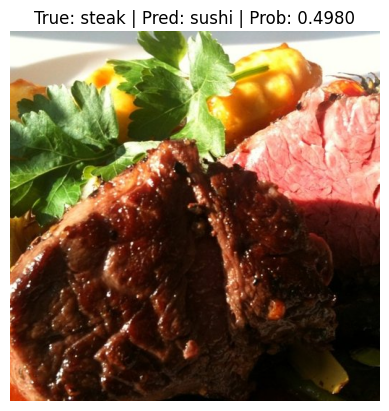

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b0_5x_10p, n=3)

### Plot 3 most wrong predictions of EffNetB2 5 epochs 10% data

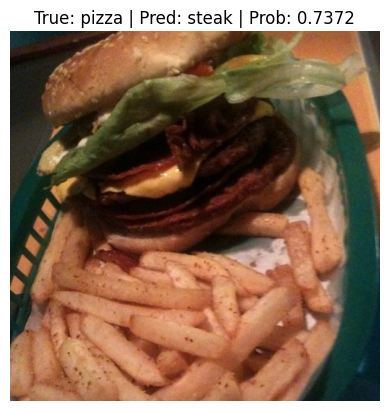

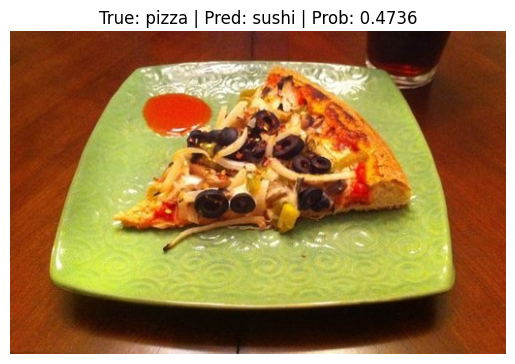

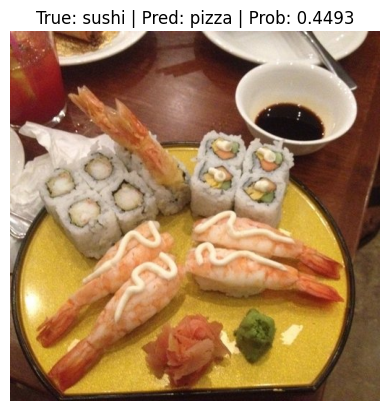

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b2_5x_10p, n=3)

### Plot 3 most wrong predictions of EffNetB0 5 epochs 20% data

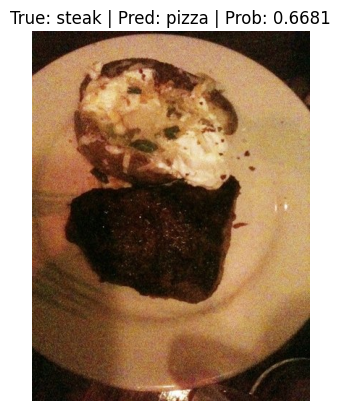

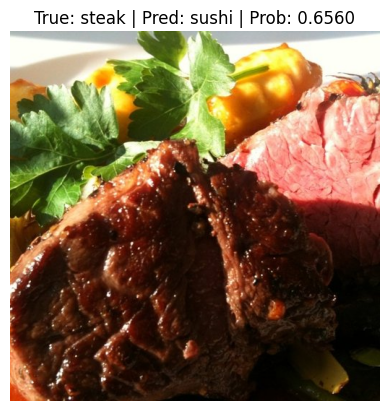

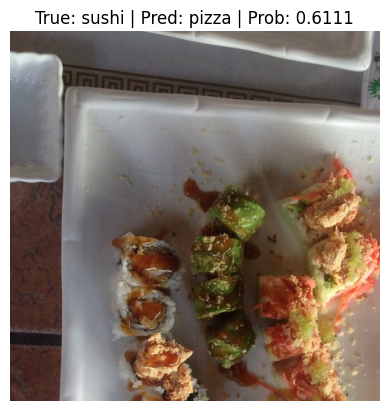

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b0_5x_20p, n=3)

### Plot 3 most wrong predictions of EffNetB2 5 epochs 20% data

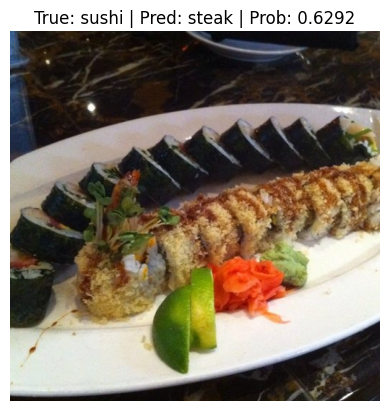

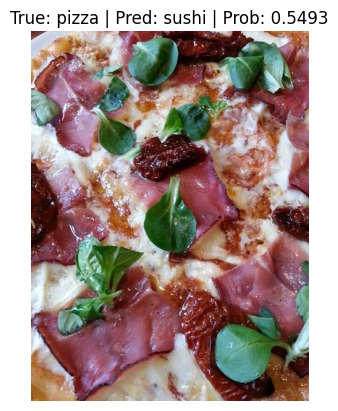

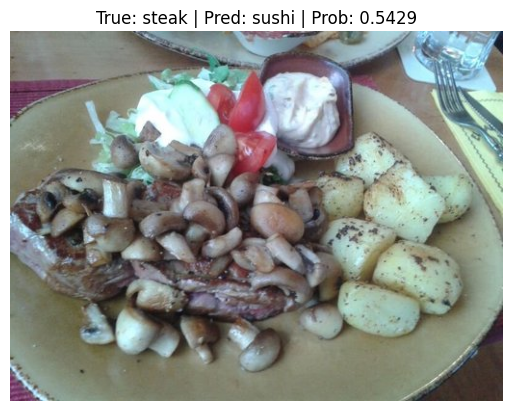

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b2_5x_20p, n=3)

### Plot 3 most wrong predictions of EffNetB0 10 epochs 10% data

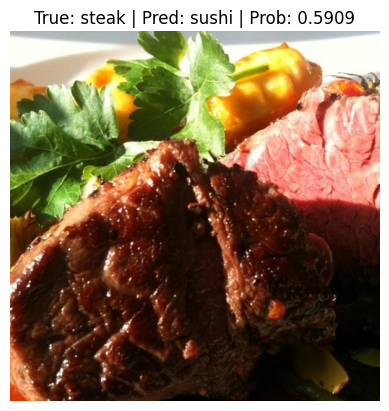

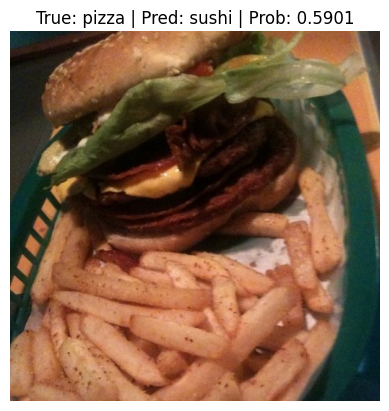

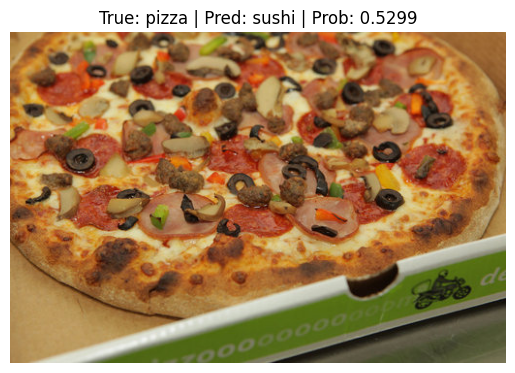

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b0_10x_10p, n=3)

### Plot 3 most wrong predictions of EffNetB2 10 epochs 10% data

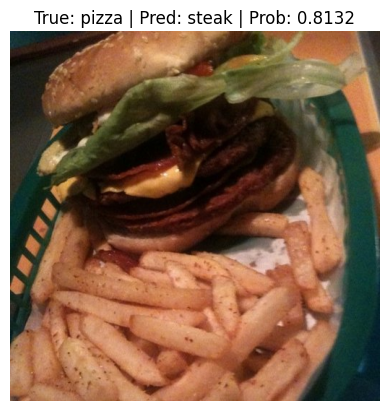

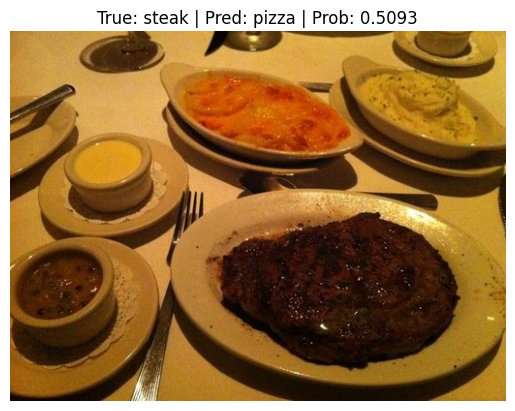

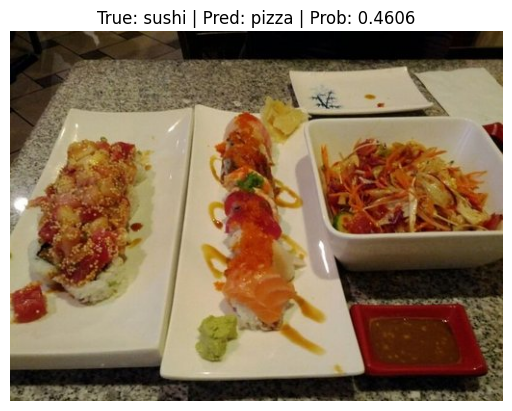

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b2_10x_10p, n=3)

### Plot 3 most wrong predictions of EffNetB0 10 epochs 20% data

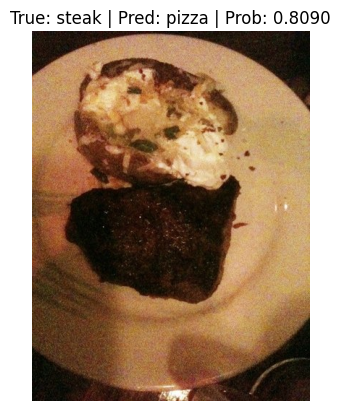

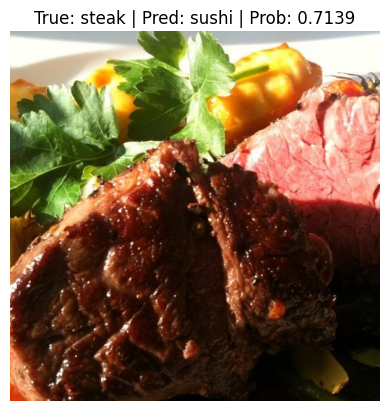

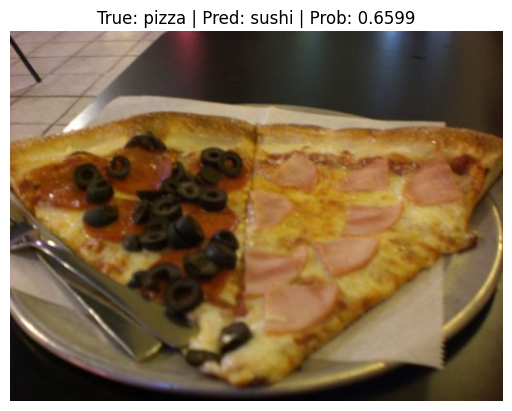

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b0_10x_20p, n=3)

### Plot 3 most wrong predictions of EffNetB2 10 epochs 20% data

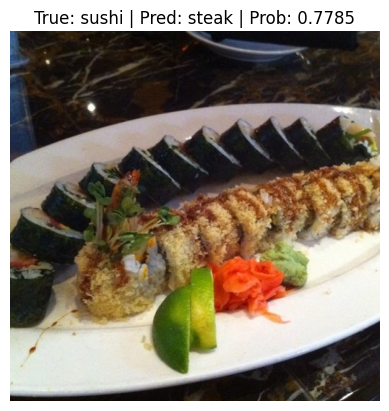

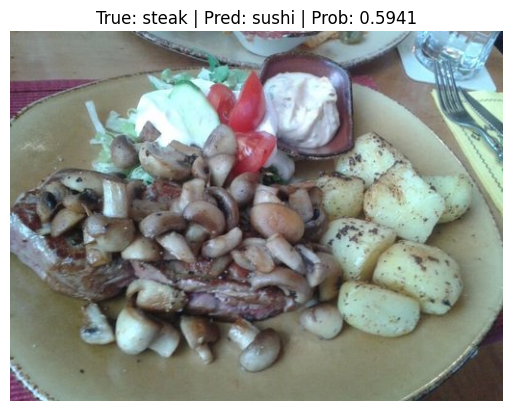

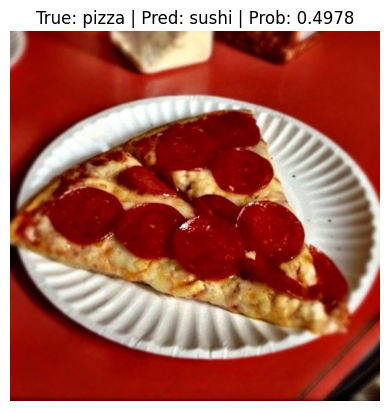

In [ ]:
pretrained.plot_N_most_wrong(pred_list_b2_10x_20p, n=3)

In [ ]:
!mkdir models
torch.save(obj=model_b2_10x_20p.state_dict(),
           f="models/model_b2_10x_20p.pth")
!ls models

model_b2_10x_20p.pth


In [ ]:
# Save the best model locally to my machine
from google.colab import files
files.download("models/model_b2_10x_20p.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>